## KNN [Consumer Classes]

### Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Download dataset

In [2]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load dataset

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis

In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

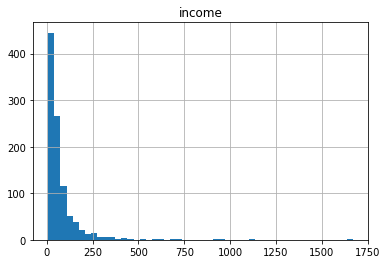

In [5]:
df.hist(column='income', bins=50)

### Define features and labels

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
X[:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [8]:
Y = df[['custcat']]
Y[:5]

,custcat
0,1
1,4
2,3
3,1
4,3


### Normalize data

In [9]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(X).transform(X.astype(float))

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=4)

print ('Train set:', trainX.shape,  trainY.shape)
print ('Test set:', testX.shape,  testY.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


### Model: KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Training

In [12]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(trainX, trainY)

C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

Predicting

In [13]:
Y_ = knn.predict(testX)
Y_[:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Evaluation

In [14]:
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(trainY, knn.predict(trainX)))
print("Test set Accuracy: ", metrics.accuracy_score(testY, Y_))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### Checking different 'k's

In [15]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(trainX, trainY)
    Y_=neigh.predict(testX)
    mean_acc[n-1] = metrics.accuracy_score(testY, Y_)
    
mean_acc

C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

### PLotting accuracies of various 'k's

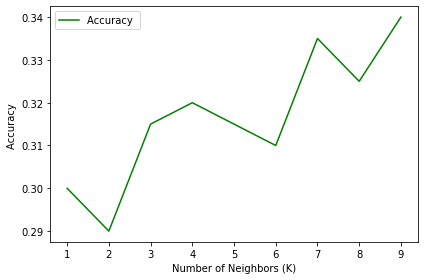

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


### Building model with k=9

In [18]:
k = 9
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X, Y)

C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

### Pickling

In [19]:
from pickle import dump

with open('KNNteleCust.pkl', 'wb') as f:
    dump(knn, f)